In [1]:
import pandas as pd
import numpy as np
import datetime
import os

In [2]:
# Create a list of dates

base = datetime.datetime(2020, 8, 21)
date_list = [(base - datetime.timedelta(days=x)*7).strftime("%Y-%m-%d") for x in range(0, 105)]
weeks_date=[]

for i in range(len(date_list)-1):
    x=f"{date_list[i+1]}--{date_list[i]}"
    weeks_date.append(x)
weeks_date

# 2 subset of dates

year_2=weeks_date[0:int(len(weeks_date)/2)]

year_1=weeks_date[int(len(weeks_date)/2):int(len(weeks_date))]
year_2

['2020-08-14--2020-08-21',
 '2020-08-07--2020-08-14',
 '2020-07-31--2020-08-07',
 '2020-07-24--2020-07-31',
 '2020-07-17--2020-07-24',
 '2020-07-10--2020-07-17',
 '2020-07-03--2020-07-10',
 '2020-06-26--2020-07-03',
 '2020-06-19--2020-06-26',
 '2020-06-12--2020-06-19',
 '2020-06-05--2020-06-12',
 '2020-05-29--2020-06-05',
 '2020-05-22--2020-05-29',
 '2020-05-15--2020-05-22',
 '2020-05-08--2020-05-15',
 '2020-05-01--2020-05-08',
 '2020-04-24--2020-05-01',
 '2020-04-17--2020-04-24',
 '2020-04-10--2020-04-17',
 '2020-04-03--2020-04-10',
 '2020-03-27--2020-04-03',
 '2020-03-20--2020-03-27',
 '2020-03-13--2020-03-20',
 '2020-03-06--2020-03-13',
 '2020-02-28--2020-03-06',
 '2020-02-21--2020-02-28',
 '2020-02-14--2020-02-21',
 '2020-02-07--2020-02-14',
 '2020-01-31--2020-02-07',
 '2020-01-24--2020-01-31',
 '2020-01-17--2020-01-24',
 '2020-01-10--2020-01-17',
 '2020-01-03--2020-01-10',
 '2019-12-27--2020-01-03',
 '2019-12-20--2019-12-27',
 '2019-12-13--2019-12-20',
 '2019-12-06--2019-12-13',
 

In [3]:
df=pd.read_csv(f"at/2020-08-14--2020-08-21.csv", header=1)

In [4]:
df_streams_y2=pd.read_csv(f"at/2020-08-14--2020-08-21.csv", header=1)[['Position']]
df_streams_y2

,Position
0,1
1,2
2,3
3,4
4,5
...,...
195,196
196,197
197,198
198,199


In [5]:
weeks_stream={}
weeks_stream['Position']=pd.read_csv(f"at/2020-08-14--2020-08-21.csv", header=1)['Position'].tolist()

In [52]:
for week in year_2:
    weeks_stream[week]=pd.read_csv(f"at/{week}.csv", header=1)['Streams'].tolist()
    
streams_at=pd.DataFrame.from_dict(weeks_stream)
streams_at=streams_at.set_index('Position')
streams_at

,2020-08-14--2020-08-21,2020-08-07--2020-08-14,2020-07-31--2020-08-07,2020-07-24--2020-07-31,2020-07-17--2020-07-24,2020-07-10--2020-07-17,2020-07-03--2020-07-10,2020-06-26--2020-07-03,2020-06-19--2020-06-26,2020-06-12--2020-06-19,...,2019-10-25--2019-11-01,2019-10-18--2019-10-25,2019-10-11--2019-10-18,2019-10-04--2019-10-11,2019-09-27--2019-10-04,2019-09-20--2019-09-27,2019-09-13--2019-09-20,2019-09-06--2019-09-13,2019-08-30--2019-09-06,2019-08-23--2019-08-30
Position,,,,,,,,,,,,,,,,,,,,,
1,273190,302017,324836,311977,308099,302504,386601,264012,357667,224989,...,410563,418588,457785,471032,475550,549468,404335,380066,385468,310124
2,227680,241059,300520,285235,237743,282031,291379,242403,302764,204898,...,356870,308957,399597,389598,427373,455019,266144,346443,261766,225569
3,192177,202007,224839,239314,212936,222618,238630,234416,225340,191831,...,253767,300312,321737,307213,410440,451666,236971,275183,215708,191873
4,172500,188339,220057,218340,202731,207093,179343,219164,187335,187463,...,252299,285376,305679,291149,296007,277053,229923,231820,208535,176551
5,168400,179806,208535,213254,185161,185521,172709,185562,184056,175384,...,240479,282485,213940,269482,247965,273819,217581,201079,202821,174656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,31334,32706,31968,32389,31282,32300,32011,30773,30098,30612,...,30297,29039,28918,28802,27915,27718,28694,28285,28735,27422
197,31292,32480,31941,32352,31199,32201,31958,30514,29976,30544,...,30275,29024,28861,28716,27833,27715,28666,28229,28707,27389
198,31157,32395,31869,32319,31191,31819,31760,30482,29915,30543,...,30222,29008,28839,28575,27830,27668,28613,28085,28699,27362


In [55]:
np.broadcast(np.array(streams_at.index.values), np.array(streams_at.columns.values))


ValueError: shape mismatch: objects cannot be broadcast to a single shape

ValueError: shape mismatch: objects cannot be broadcast to a single shape

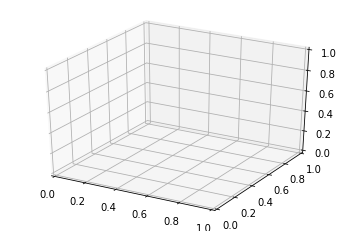

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = streams_at.index.values
Y = streams_at.columns.values
X, Y = np.meshgrid(X,Y)

Y=np.rot90(Y)

Z = streams_at.values
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [51]:
np.broadcast_arrays(X, Y, Z)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

ValueError: shape mismatch: objects cannot be broadcast to a single shape

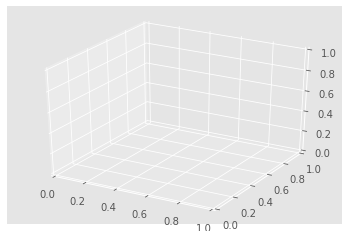

In [156]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = streams_at.index.values
y = streams_at.columns.values

X, Y = np.meshgrid(x, y)
Z = streams_at.values

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')
plt.show()